In [2]:
import os
import sys
import numpy as np
import spikeplots as sp
import spikeoutputs as so
# sys.path.append('../')
import celltype_io as ctio
import importlib
importlib.reload(so)
importlib.reload(ctio)
import math
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import numpy as np

import visionloader as vl
import os

import seaborn as sns

In [3]:
str_experiment = '20230314C'
str_algo = 'kilosort2'
str_chunk = 'chunk1'

str_analysis_dir = '/Volumes/SrinDrive/'

str_exp_dir = os.path.join(str_analysis_dir, str_experiment, str_chunk, str_algo)
str_class = 'kilosort2.classification.txt'
str_params = 'kilosort2.params'

d_paths = {'str_experiment': str_experiment, 'paramsfile': os.path.join(str_exp_dir, str_params), 
           'dataset_name': str_algo, 'str_protocol': 'noise', 
           'str_classification': os.path.join(str_exp_dir, str_class), 'str_chunk': str_chunk}

In [4]:
data = so.SpikeOutputs(**d_paths)
data.load_sta()

Loading STA from /Volumes/SrinDrive/20230314C/chunk1/kilosort2/kilosort2.params...
Loaded STA for 844 cells.


In [5]:
str_datafile = '/Users/srinidhienaidu/Desktop/Rieke Lab Data/20230314C_kilosort2_data001_data002_data003_data004__dimflash.pkl'

with open(str_datafile, "rb") as f:
   d_data = pickle.load(f)

# vcd = vl.load_vision_data(str_datafile, sort_algorithm, include_params = True, include_neurons = True)

In [6]:
# spike_array = d_data['spike_array']
spike_dict = d_data['spike_dict']
spot_intensity = d_data['spot_intensity']
# avg_psth = d_data['avg_psth']
cluster_id = list(spike_dict.keys())
pre_pts = d_data['pre_pts'][0]
stim_pts = d_data['stim_pts'][0]
tail_pts = d_data['tail_pts'][0]
bin_rate = d_data['bin_rate']
spike_times = d_data['spike_times']
unique_params = d_data['unique_params']
unique_intensity = unique_params['spotIntensity']

In [7]:
data.d_sta[1]
data.types.print_summary(b_only_main_types=True)

OnP_ID = data.types.d_main_IDs['OnP']

OnP_spike_dict = {}

for cell in OnP_ID:
    if cell in spike_dict:
        OnP_spike_dict[cell] = spike_dict[cell]

Total number of cells: 844
Number of OffP: 0
Number of OffM: 0
Number of OnP: 64
Number of OnM: 210
Number of SBC: 0


In [10]:
sum = np.zeros((4, 102))
noise_correlations = np.zeros((4, 102))

for cell_id in OnP_spike_dict.keys():
    cell = OnP_spike_dict[cell_id]

    int_1 = cell[np.where(spot_intensity == 0.1)]
    avg_1 = np.mean(int_1, axis = 0)
    # noise_correlations[0,:] += 
    sum[0, :] += avg_1/(len(OnP_spike_dict.keys()))
    int_2 = cell[np.where(spot_intensity == 0.2)]
    avg_2 = np.mean(int_2, axis = 0)
    sum[1, :] += avg_2/(len(OnP_spike_dict.keys()))
    int_4 = cell[np.where(spot_intensity == 0.4)]
    avg_4 = np.mean(int_4, axis = 0)
    sum[2, :] += avg_4/(len(OnP_spike_dict.keys()))
    int_8 = cell[np.where(spot_intensity == 0.8)]
    avg_8 = np.mean(int_8, axis = 0)
    sum[3, :] += avg_8/(len(OnP_spike_dict.keys()))

sum = np.divide(sum, len(OnP_ID))

In [11]:
spike_dict[1].shape

(800, 102)

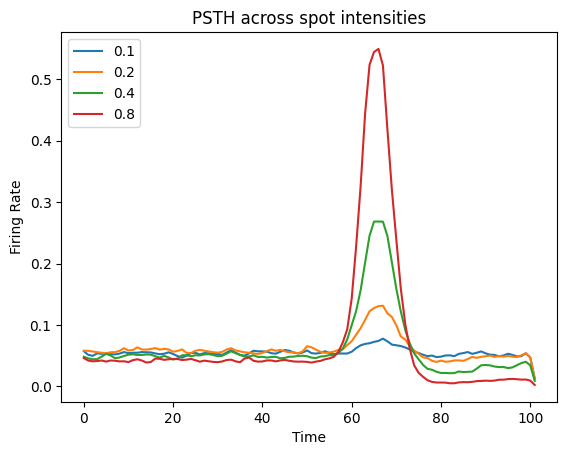

In [12]:
plt.plot(sum[0], label = '0.1')
plt.plot(sum[1], label = '0.2')
plt.plot(sum[2], label = '0.4')
plt.plot(sum[3], label = '0.8')
plt.legend(loc = 'upper left')

plt.title('PSTH across spot intensities')
plt.xlabel('Time')
plt.ylabel('Firing Rate')

plt.show()

In [13]:
on_p_idx = np.where(np.in1d(cluster_id, OnP_ID))[0]
# exclude_OnP = np.array([]) 

In [14]:
OnP_ID = np.array(list(OnP_spike_dict.keys()))

In [15]:
count = 0
sig_noise_corr = {}
noise_corr = {}

for i in range(len(OnP_ID)):
    for j in range(len(OnP_ID)):

        idx_1 = OnP_ID[i]
        idx_2 = OnP_ID[j]

        cell_1_dict = OnP_spike_dict[idx_1]
        cell_2_dict = OnP_spike_dict[idx_2]

        x1 = data.d_sta[idx_1]['x0']
        y1 = data.d_sta[idx_1]['y0']
        x2 = data.d_sta[idx_2]['x0']
        y2 = data.d_sta[idx_2]['y0']

        point_1 = np.array((x1, y1))
        point_2 = np.array((x2, y2))


        distance = np.linalg.norm(idx_1-idx_2)

        noise_dict_1 = cell_1_dict[:, :49]
        noise_dict_2 = cell_2_dict[:, :49]

        int_1_1 = (cell_1_dict[np.where(spot_intensity == 0.1)]).flatten()
        int_1_2 = (cell_2_dict[np.where(spot_intensity == 0.1)]).flatten()
        int_1_1_1 = (noise_dict_1[np.where(spot_intensity == 0.1)]).flatten()
        int_1_1_2 = (noise_dict_2[np.where(spot_intensity == 0.1)]).flatten()
        
        int_2_1 = (cell_1_dict[np.where(spot_intensity == 0.2)]).flatten()
        int_2_2 = (cell_2_dict[np.where(spot_intensity == 0.2)]).flatten()
        int_2_1_1 = (noise_dict_1[np.where(spot_intensity == 0.2)]).flatten()
        int_2_1_2 = (noise_dict_2[np.where(spot_intensity == 0.2)]).flatten()
        
        int_4_1 = (cell_1_dict[np.where(spot_intensity == 0.4)]).flatten()
        int_4_2 = (cell_2_dict[np.where(spot_intensity == 0.4)]).flatten()
        int_4_1_1 = (noise_dict_1[np.where(spot_intensity == 0.4)]).flatten()
        int_4_1_2 = (noise_dict_2[np.where(spot_intensity == 0.4)]).flatten()
        
        int_8_1 = (cell_1_dict[np.where(spot_intensity == 0.8)]).flatten()
        int_8_2 = (cell_2_dict[np.where(spot_intensity == 0.8)]).flatten()
        int_8_1_1 = (noise_dict_1[np.where(spot_intensity == 0.8)]).flatten()
        int_8_1_2 = (noise_dict_2[np.where(spot_intensity == 0.8)]).flatten()

        corr_1 = np.corrcoef(int_1_1, int_1_2)[0,1]
        corr_2 = np.corrcoef(int_2_1, int_2_2)[0,1]
        corr_4 = np.corrcoef(int_4_1, int_4_2)[0,1]
        corr_8 = np.corrcoef(int_8_1, int_8_2)[0,1]

        corr_1_1 = np.corrcoef(int_1_1_1, int_1_1_2)[0,1]
        corr_2_1 = np.corrcoef(int_2_1_1, int_2_1_2)[0,1]
        corr_4_1 = np.corrcoef(int_4_1_1, int_4_1_2)[0,1]
        corr_8_1 = np.corrcoef(int_8_1_1, int_8_1_2)[0,1]
        
        sig_noise_corr[distance] = corr_1, corr_2, corr_4,corr_8
        noise_corr[distance] = corr_1_1, corr_2_1, corr_4_1, corr_8_1


/Users/srinidhienaidu/anaconda3/envs/mea/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/srinidhienaidu/anaconda3/envs/mea/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/srinidhienaidu/anaconda3/envs/mea/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[:, None]
/Users/srinidhienaidu/anaconda3/envs/mea/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[None, :]


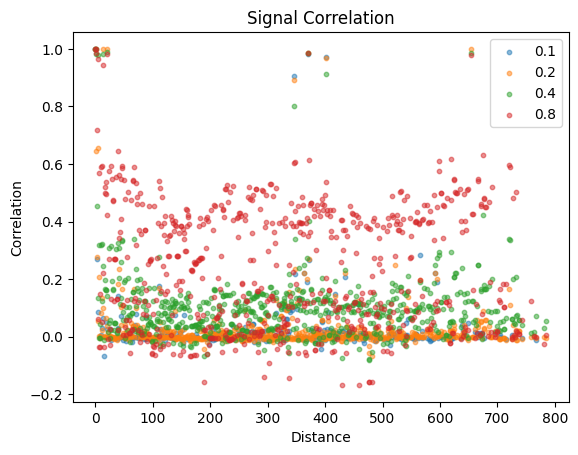

In [16]:
values_0 = []
values_1 = []
values_2 = []
values_3 = []
for cell in (sig_noise_corr.keys()):
    values_0.append(sig_noise_corr[cell][0])
    values_1.append(sig_noise_corr[cell][1])
    values_2.append(sig_noise_corr[cell][2])
    values_3.append(sig_noise_corr[cell][3])
plt.scatter(sig_noise_corr.keys(), values_0, label = '0.1', s = 10, alpha = 0.5)
plt.scatter(sig_noise_corr.keys(), values_1, label = '0.2', s = 10, alpha = 0.5)
plt.scatter(sig_noise_corr.keys(), values_2, label = '0.4', s = 10, alpha = 0.5)
plt.scatter(sig_noise_corr.keys(), values_3, label = '0.8', s = 10, alpha = 0.5)

plt.xlabel('Distance')
plt.ylabel('Correlation')
plt.title('Signal Correlation')
plt.legend()

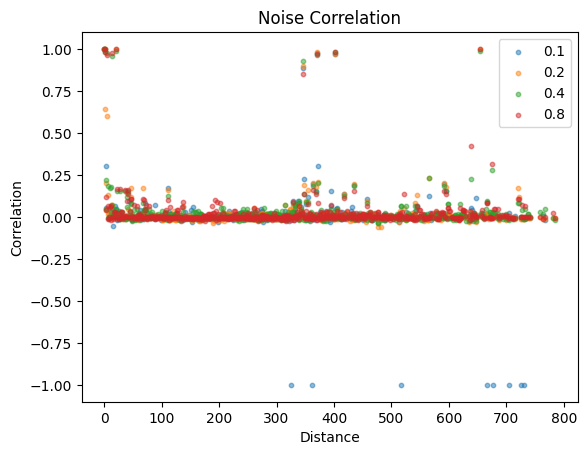

In [17]:
values_0_1 = []
values_1_1 = []
values_2_1 = []
values_3_1 = []
for cell in (noise_corr.keys()):
    values_0_1.append(noise_corr[cell][0])
    values_1_1.append(noise_corr[cell][1])
    values_2_1.append(noise_corr[cell][2])
    values_3_1.append(noise_corr[cell][3])
plt.scatter(noise_corr.keys(), values_0_1, label = '0.1', s = 10, alpha = 0.5)
plt.scatter(noise_corr.keys(), values_1_1, label = '0.2', s = 10, alpha = 0.5)
plt.scatter(noise_corr.keys(), values_2_1, label = '0.4', s = 10, alpha = 0.5)
plt.scatter(noise_corr.keys(), values_3_1, label = '0.8', s = 10, alpha = 0.5)

plt.xlabel('Distance')
plt.ylabel('Correlation')
plt.title('Noise Correlation')
plt.legend()

woah look at those outliers thats pretty cool maybe pull those cells out!


In [18]:
raster_1 = range(0, 200)
raster_2 = range(200, 400)
raster_4 = range(400, 600)
raster_8 = range(600, 800)

In [19]:
def plot_raster(light_level, title):
    for cell_idx in on_p_idx:
        plt.eventplot(spike_times[cell_idx][light_level])
    plt.axvline(x=500, color = 'r')
    plt.xlim(0, 1000)
    plt.ylim(0, 200)
    plt.xlabel('Time (ms)')
    plt.ylabel('Epoch')
    plt.title(title)

In [20]:
raw_counts = {}
count = 0

for p_idx in on_p_idx:
    raw_array = np.arange((800))
    for epoch in range(800):
        val_type = spike_times[p_idx][epoch]
        if not isinstance(val_type, int):
            raw_array[epoch] = len(val_type)
        else: 
            raw_array[epoch] = 0
    print(raw_array)
    count += 1
print(count)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 2 0
 1 3 0 1 4 2 1 0 0 2 0 0 2 0 2 1 3 3 0 0 1 0 1 0 3 2 2 0 1 3 3 3 1 2 3 1 1
 0 1 0 2 2 1 1 1 4 3 3 0 3 4 1 5 0 0 2 2 1 1 3 5 2 4 1 4 0 0 0 0 1 3 2 1 3
 0 0 1 2 2 1 2 1 2 2 3 0 

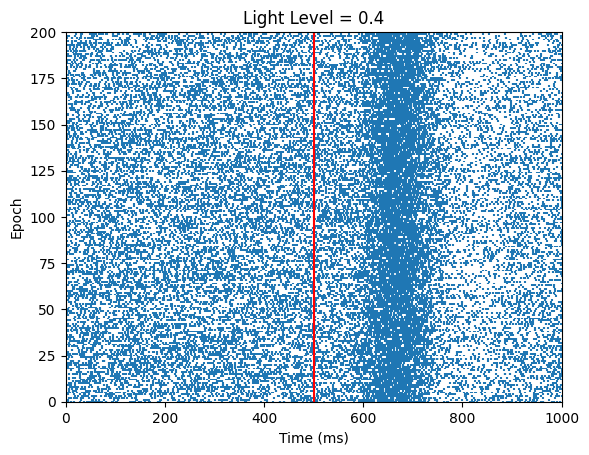

In [21]:
# plot_raster(raster_1, 'Light Level = 0.1')
# plot_raster(raster_2, 'Light Level = 0.2')
plot_raster(raster_4, 'Light Level = 0.4')
# plot_raster(raster_8, 'Light Level = 0.8')

In [27]:
OnP_spike_dict[6].shape
# Is the right thing to take the spike times, and add them across epochs and then split the epochs in half? 



(800, 102)

d-prime - assumes that data is distributed with gaussian 

paired t test- assumes that data is distributed with gaussian 

nonparametric willxoxon rank sum test
    - paired vs unpaired 
    - subtracting the stim timee from pre time 

approaches to not assume gaussain distribution- information theoretic analysis
    - jensen shannon 
        - order does not matter (calculates the mean distribution)

    - kolbach leiber divergence
        - downside = order of things matter, also not bounded 
        -  should get a symetrical metric that goes from 0-1
        - if non discriminable, you will get 0 bits 

